# 스크롤 페이징
- 동적 사이트
- 크롤링 결과를, 가격순 정렬
- header 정보

엑셀로 저장
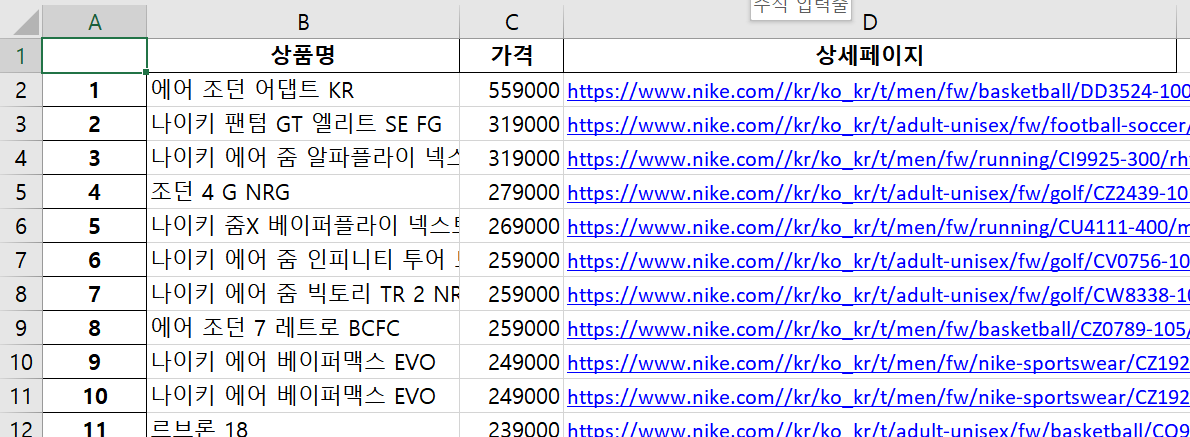

In [1]:
import requests
from bs4 import BeautifulSoup

In [ ]:
""" request url 
https://www.nike.com/kr/ko_kr/w/men/fw
?
page=2&
pageSize=40&
lineSize=5&
_=1622164027854

"""
None

## 스크롤 페이징 분석

In [2]:
# 스크롤 페이징 분석 결과
# text/html 문서로 페이징 response 받는 것을 알수 있다.  (2020.05 현재)
# 게다가 중간중간에 상품이 아닌 이벤트(?) 구매 링크도 삽입되어 있는 형태다 (걸러 내야 한다)

# url 형태
# page 값으로 페이징 한다.
# ex) https://www.nike.com/kr/ko_kr/w/new/fw/xc/new-mens-shoes?page=2&pageSize=40&lineSize=5&_=1590244038313


In [3]:
# 일단 한페이지만 크롤링 해보자

In [4]:
url = 'https://www.nike.com/kr/ko_kr/w/men/fw?page=3&pageSize=40&lineSize=5&_=1622164027854'

In [5]:
response = requests.get(url)
response

<Response [200]>

In [10]:
len(response.text)

12950

In [9]:
headers = {
    'user-agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/90.0.4430.212 Safari/537.36'
}

In [11]:
response = requests.get(url, headers=headers)
response

<Response [200]>

In [12]:
len(response.text)

589508

In [15]:
# response code 값이 200 이라 해서 안심하지 말자!!
# 에러페이지 혹은 빈페이지 resopnse 하고선 code 값만 200으로 하는 사이트도 많다..

In [13]:
dom = BeautifulSoup(response.text, 'html.parser')
# dom

In [14]:
items = dom.select('ul.item-list-wrap > li')
len(items)

# 이 결과 안에는 '상품' 뿐 아니라 '이벤트' 도 담겨 있다.
# '상품' 만 뽑아내려면 어케 하나?

41

관찰
- 상품 과 이벤트의 element 구성이 다르다!
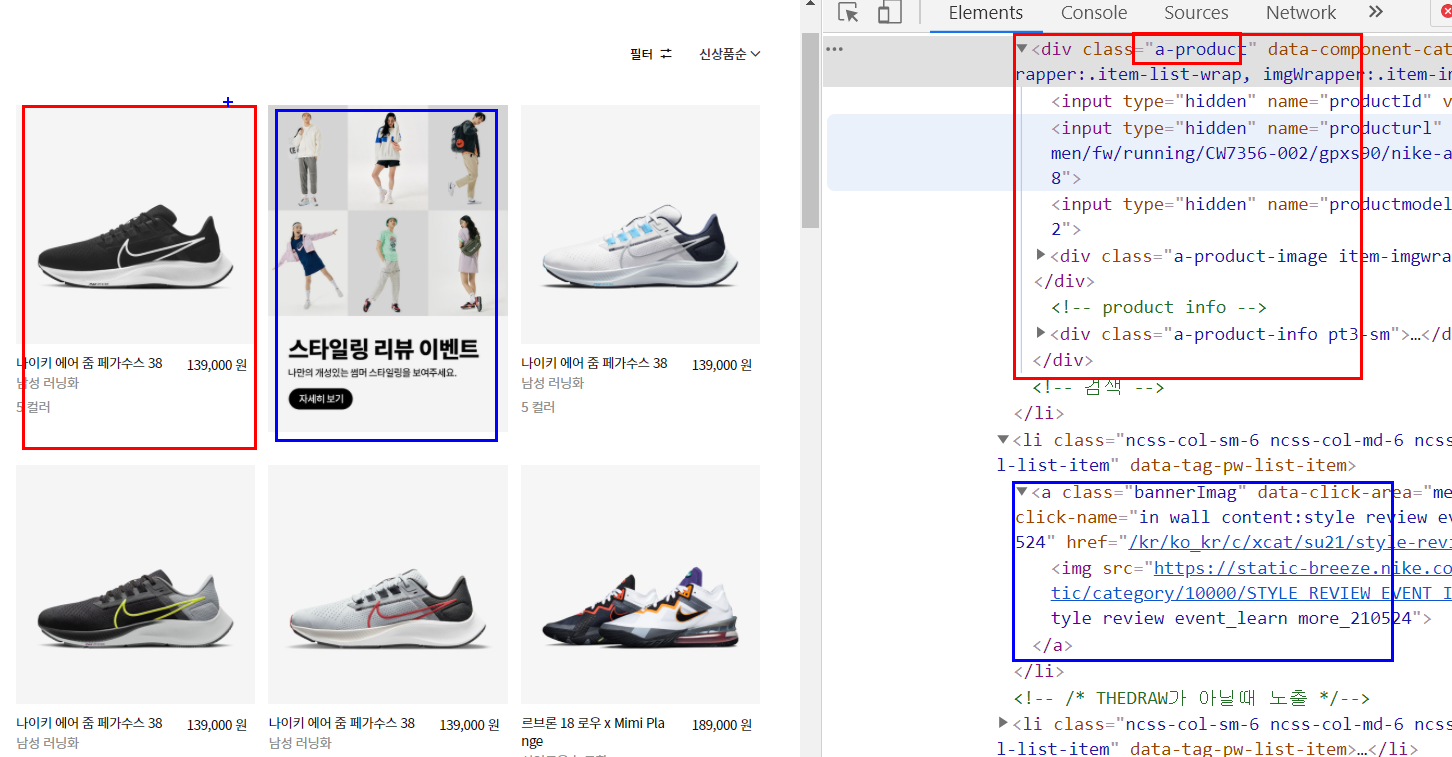

In [17]:
# 상품만 골라내기
item_list = dom.select('ul.item-list-wrap > li div.a-product')
len(item_list)

40

In [18]:
# 제품이름
item_list[0].select_one('div.product-info span.item-title').text.strip()

'나이키 에어 줌 페가수스 38'

In [20]:
# 가격
item_list[0].select_one('div.product-price p.product-display-price').text.strip()

'139,000 원'

In [24]:
# 상세페이지 url
item_url = item_list[0].select_one('div.a-product-image a.a-product-image-link').attrs['href']

print('https://www.nike.com' + item_url)

https://www.nike.com/kr/ko_kr/t/men/fw/running/CW7356-002/gpxs90/nike-air-zoom-pegasus-38


## 한 페이지 클롤링.  함수로 만들기
- 가격은 '정수' 타입으로 만들기

In [27]:
import requests
from bs4 import BeautifulSoup
import re

def nike_page(page = 1):
    url = f"https://www.nike.com/kr/ko_kr/w/new/fw/xc/new-mens-shoes?page={page}&pageSize=40&lineSize=5&_=1590244038313"
    headers = {
        "user-agent" : "user-agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/77.0.3865.90 Safari/537.36"
    }
    response = requests.get(url, headers=headers)
    dom = BeautifulSoup(response.text, "html.parser")
    item_list = dom.select("ul.item-list-wrap > li div.a-product")
    result = [
        {
            "title" : item.select_one("div.product-info span.item-title").text.strip(),
            "price" : int(re.sub('[^0-9]', '', item.select_one("div.product-price p.product-display-price").text.strip())),
            "url" : 'https://www.nike.com' + item.select_one("div.a-product-image a.a-product-image-link").attrs['href'].strip()
        }
        for item in item_list
    ]
    return result



In [30]:
# 실행예시
nike_page(4)

[{'title': '나이키 에어맥스 GENOME',
  'price': 199000,
  'url': 'https://www.nike.com/kr/ko_kr/t/men/fw/nike-sportswear/CW1648-003/thoz50/air-max-genome'},
 {'title': '나이키 에어맥스 GENOME',
  'price': 199000,
  'url': 'https://www.nike.com/kr/ko_kr/t/men/fw/nike-sportswear/CW1648-004/jzfo47/air-max-genome'},
 {'title': '나이키 에어맥스 2X',
  'price': 109000,
  'url': 'https://www.nike.com/kr/ko_kr/t/men/fw/nike-sportswear/CK2943-007/nweg46/nike-air-max-2x'},
 {'title': '나이키 SB 줌 블레이저 로우 프로 GT',
  'price': 99000,
  'url': 'https://www.nike.com/kr/ko_kr/t/adult-unisex/fw/action-outdoor/DC7695-100/amxz86/nike-sb-zoom-blazer-low-pro-gt'},
 {'title': '조던 MA2',
  'price': 149000,
  'url': 'https://www.nike.com/kr/ko_kr/t/men/fw/basketball/CV8122-102/wfql96/jordan-ma2'},
 {'title': '나이키 에어 줌 G.T 컷',
  'price': 209000,
  'url': 'https://www.nike.com/kr/ko_kr/t/adult-unisex/fw/basketball/CZ0175-001/snum25/nike-air-zoom-g-t-cut'},
 {'title': 'KD14 EP',
  'price': 179000,
  'url': 'https://www.nike.com/kr/ko_kr/

## 원하는 분량의 페이징 가져오기

In [31]:
result = []

for page in range(1, 5):
    print(page, '페이지 크롤링...')
    page_result = nike_page(page)
    result = result + page_result

result

1 페이지 크롤링...
2 페이지 크롤링...
3 페이지 크롤링...
4 페이지 크롤링...


[{'title': '나이키 에어 포스 1 EXPERIMENTAL',
  'price': 159000,
  'url': 'https://www.nike.com/kr/ko_kr/t/men/fw/nike-sportswear/CZ1528-100/kkxw81/air-force-1-experimental'},
 {'title': "나이키 에어 포스 1 '07 LV8",
  'price': 139000,
  'url': 'https://www.nike.com/kr/ko_kr/t/men/fw/nike-sportswear/CZ0338-001/mtsn52/air-force-1-07-lv8'},
 {'title': '나이키 에어 모어 업템포 ‘96',
  'price': 189000,
  'url': 'https://www.nike.com/kr/ko_kr/t/men/fw/nike-sportswear/921948-102/xjnz49/air-more-uptempo-96'},
 {'title': '조던 자이언 1 PF',
  'price': 139000,
  'url': 'https://www.nike.com/kr/ko_kr/t/men/fw/basketball/DA3129-100/xtkt84/jordan-zion-1-pf'},
 {'title': '에어 조던 35 로우 PF',
  'price': 199000,
  'url': 'https://www.nike.com/kr/ko_kr/t/men/fw/basketball/CW2459-101/guxa28/air-jordan-xxxv-low-pf'},
 {'title': '나이키 크레이터 임팩트',
  'price': 119000,
  'url': 'https://www.nike.com/kr/ko_kr/t/men/fw/nike-sportswear/DB2477-020/thwu79/nike-crater-impact'},
 {'title': '나이키 에어맥스 90 G NRG P21',
  'price': 179000,
  'url': 'https

# DataFrame 에 담기

In [32]:
import pandas as pd
df = pd.DataFrame(result)
df

,title,price,url
0,나이키 에어 포스 1 EXPERIMENTAL,159000,https://www.nike.com/kr/ko_kr/t/men/fw/nike-sp...
1,나이키 에어 포스 1 '07 LV8,139000,https://www.nike.com/kr/ko_kr/t/men/fw/nike-sp...
2,나이키 에어 모어 업템포 ‘96,189000,https://www.nike.com/kr/ko_kr/t/men/fw/nike-sp...
3,조던 자이언 1 PF,139000,https://www.nike.com/kr/ko_kr/t/men/fw/basketb...
4,에어 조던 35 로우 PF,199000,https://www.nike.com/kr/ko_kr/t/men/fw/basketb...
...,...,...,...
155,나이키 SB 줌 블레이저 미드,109000,https://www.nike.com/kr/ko_kr/t/adult-unisex/f...
156,나이키 에어 포스 1 EXPERIMENTAL,159000,https://www.nike.com/kr/ko_kr/t/men/fw/nike-sp...
157,나이키 에어 페가수스 '83,119000,https://www.nike.com/kr/ko_kr/t/men/fw/nike-sp...
158,나이키 에어 페가수스 '83,119000,https://www.nike.com/kr/ko_kr/t/men/fw/nike-sp...


In [33]:
df.columns = ['상품명', '가격', '상세페이지']
df

,상품명,가격,상세페이지
0,나이키 에어 포스 1 EXPERIMENTAL,159000,https://www.nike.com/kr/ko_kr/t/men/fw/nike-sp...
1,나이키 에어 포스 1 '07 LV8,139000,https://www.nike.com/kr/ko_kr/t/men/fw/nike-sp...
2,나이키 에어 모어 업템포 ‘96,189000,https://www.nike.com/kr/ko_kr/t/men/fw/nike-sp...
3,조던 자이언 1 PF,139000,https://www.nike.com/kr/ko_kr/t/men/fw/basketb...
4,에어 조던 35 로우 PF,199000,https://www.nike.com/kr/ko_kr/t/men/fw/basketb...
...,...,...,...
155,나이키 SB 줌 블레이저 미드,109000,https://www.nike.com/kr/ko_kr/t/adult-unisex/f...
156,나이키 에어 포스 1 EXPERIMENTAL,159000,https://www.nike.com/kr/ko_kr/t/men/fw/nike-sp...
157,나이키 에어 페가수스 '83,119000,https://www.nike.com/kr/ko_kr/t/men/fw/nike-sp...
158,나이키 에어 페가수스 '83,119000,https://www.nike.com/kr/ko_kr/t/men/fw/nike-sp...


In [34]:
df.sort_values(by='가격', ascending=False)  # 가격 내림차순 정렬

,상품명,가격,상세페이지
76,에어 조던 어댑트 KR,559000,https://www.nike.com/kr/ko_kr/t/men/fw/basketb...
21,나이키 팬텀 GT 엘리트 SE FG,319000,https://www.nike.com/kr/ko_kr/t/adult-unisex/f...
115,나이키 에어 줌 알파플라이 넥스트%,319000,https://www.nike.com/kr/ko_kr/t/men/fw/running...
7,조던 4 G NRG,279000,https://www.nike.com/kr/ko_kr/t/adult-unisex/f...
58,나이키 줌X 베이퍼플라이 넥스트% 2,269000,https://www.nike.com/kr/ko_kr/t/men/fw/running...
...,...,...,...
43,나이키 아수나,49000,https://www.nike.com/kr/ko_kr/t/men/fw/nike-sp...
138,나이키 빅토리 원 믹스,39000,https://www.nike.com/kr/ko_kr/t/men/fw/nike-sp...
137,나이키 빅토리 원 믹스,39000,https://www.nike.com/kr/ko_kr/t/men/fw/nike-sp...
136,나이키 오프코트,39000,https://www.nike.com/kr/ko_kr/t/men/fw/nike-sp...


In [35]:
df.sort_values(by='가격', ascending=False, inplace=True) 

In [36]:
df.reset_index(drop=True, inplace=True)
df

,상품명,가격,상세페이지
0,에어 조던 어댑트 KR,559000,https://www.nike.com/kr/ko_kr/t/men/fw/basketb...
1,나이키 팬텀 GT 엘리트 SE FG,319000,https://www.nike.com/kr/ko_kr/t/adult-unisex/f...
2,나이키 에어 줌 알파플라이 넥스트%,319000,https://www.nike.com/kr/ko_kr/t/men/fw/running...
3,조던 4 G NRG,279000,https://www.nike.com/kr/ko_kr/t/adult-unisex/f...
4,나이키 줌X 베이퍼플라이 넥스트% 2,269000,https://www.nike.com/kr/ko_kr/t/men/fw/running...
...,...,...,...
155,나이키 아수나,49000,https://www.nike.com/kr/ko_kr/t/men/fw/nike-sp...
156,나이키 빅토리 원 믹스,39000,https://www.nike.com/kr/ko_kr/t/men/fw/nike-sp...
157,나이키 빅토리 원 믹스,39000,https://www.nike.com/kr/ko_kr/t/men/fw/nike-sp...
158,나이키 오프코트,39000,https://www.nike.com/kr/ko_kr/t/men/fw/nike-sp...


In [37]:
df.index += 1
df

,상품명,가격,상세페이지
1,에어 조던 어댑트 KR,559000,https://www.nike.com/kr/ko_kr/t/men/fw/basketb...
2,나이키 팬텀 GT 엘리트 SE FG,319000,https://www.nike.com/kr/ko_kr/t/adult-unisex/f...
3,나이키 에어 줌 알파플라이 넥스트%,319000,https://www.nike.com/kr/ko_kr/t/men/fw/running...
4,조던 4 G NRG,279000,https://www.nike.com/kr/ko_kr/t/adult-unisex/f...
5,나이키 줌X 베이퍼플라이 넥스트% 2,269000,https://www.nike.com/kr/ko_kr/t/men/fw/running...
...,...,...,...
156,나이키 아수나,49000,https://www.nike.com/kr/ko_kr/t/men/fw/nike-sp...
157,나이키 빅토리 원 믹스,39000,https://www.nike.com/kr/ko_kr/t/men/fw/nike-sp...
158,나이키 빅토리 원 믹스,39000,https://www.nike.com/kr/ko_kr/t/men/fw/nike-sp...
159,나이키 오프코트,39000,https://www.nike.com/kr/ko_kr/t/men/fw/nike-sp...
